In [1]:
import os
os.chdir(r'../source')

from simulation.terrain import find_points, visualize, get_elevation, lat_long_to_cartesian

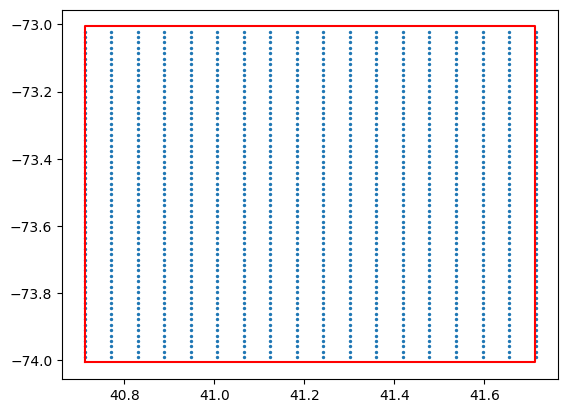

[7.675545692443848, 11.41111278533936, 78.6399154663086, 3.789817810058594, 32.5496711730957, 22.4548397064209, 52.25086975097656, 80.74224090576172, 41.03453063964844, 52.0493049621582, 108.6064605712891, 318.3347473144531, 314.9683227539062, 0, 0, 144.1584014892578, 160.3700561523438, 231.7146606445312, 0, 23.33745002746582, 29.6684741973877, 22.83674430847168, 39.77883911132812, 12.73776912689209, 26.0112190246582, 55.76461410522461, 50.26775360107422, 26.06077575683594, 6.031119346618652, 124.648323059082, 32.07795715332031, 44.06596374511719, 9.003186225891113, 52.72038650512695, 128.0238647460938, 98.74488067626953, 14.72592639923096, 17.77225685119629, 0, 105.2630462646484, 13.26310348510742, 20.82705688476562, 65.44812774658203, 33.92034149169922, 153.5916748046875, 0, 4.845532894134521, 0, 15.92047214508057, 245.5247192382812, 48.8467903137207, 0, 52.18967056274414, 94.36815643310547, 14.49752712249756, 4.404266834259033, 40.68185043334961, 32.4290771484375, 62.58698654174805,

In [2]:
# Define a contour
square_contour = [(40.712776, -74.005974), (40.712776, -73.005974), (41.712776, -73.005974), (41.712776, -74.005974)]

# Find points within the contour or near it
square_result = find_points(square_contour, 1800)

# Visualize the contour and the points
visualize(square_contour, square_result)

# Fetch elevation data for the points
elevation_data = get_elevation(square_result)

# Print the elevation data
print(elevation_data)


In [3]:
def merge_elevation_data(points, elevation_data):
    merged_data = []
    for (lat, lon), elevation in zip(points, elevation_data):
        merged_data.append((lat, lon, elevation))
    return merged_data

merged_data = merge_elevation_data(square_result, elevation_data)


C:\Users\migue\AppData\Local\Temp\ipykernel_2940\2594144530.py:4: DeprecationWarning: Please use `gaussian_filter` from the `scipy.ndimage` namespace, the `scipy.ndimage.filters` namespace is deprecated.
  from scipy.ndimage.filters import gaussian_filter


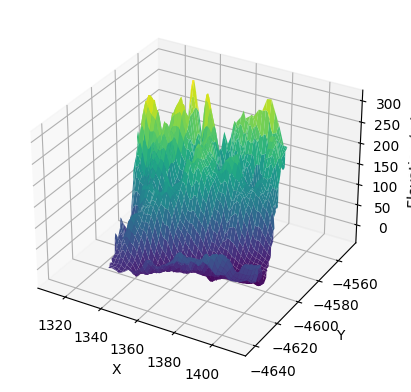

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.ndimage.filters import gaussian_filter
from scipy.interpolate import griddata

def plot_smoothed_surface(merged_data, sigma=1):
    # Convert the lat, lon, and elevation data into cartesian coordinates
    coords = np.array([lat_long_to_cartesian(lat, lon) for lat, lon, elevation in merged_data])
    x = coords[:, 0]
    y = coords[:, 1]
    z = np.array([elevation for lat, lon, elevation in merged_data])

    # Create a grid for the x, y, and z data
    xi = np.linspace(min(x), max(x), 100)
    yi = np.linspace(min(y), max(y), 100)
    xi, yi = np.meshgrid(xi, yi)
    zi = griddata((x, y), z, (xi, yi), method='linear')

    # Apply Gaussian filter to smooth the surface
    smoothed_zi = gaussian_filter(zi, sigma)

    # Plot the smoothed surface
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_surface(xi, yi, smoothed_zi, cmap='viridis', linewidth=0)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Elevation (m)')

    plt.show()
    return xi, yi, smoothed_zi

# Plot the smoothed surface
x,y,z = plot_smoothed_surface(merged_data, sigma=1)
#plt.plot(z); 

C:\Users\migue\AppData\Local\Temp\ipykernel_2940\1117977075.py:16: RuntimeWarning: invalid value encountered in double_scalars
  wind_spd[i, j] = ref_wind_speed * (height / ref_height) ** alpha


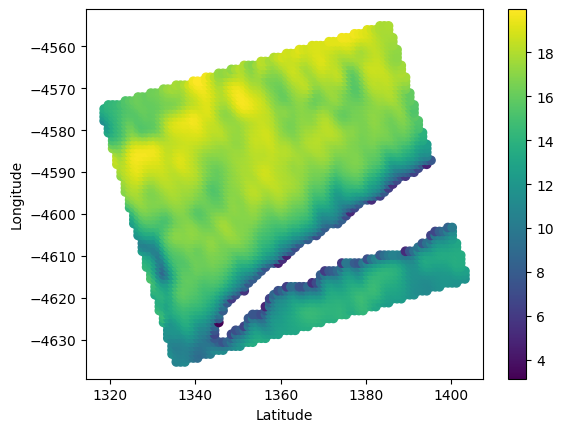

In [5]:
def calculate_wind_gradient(coordinates: np.ndarray, ref_wind_speed: float, ref_height: float, alpha: float):
    """
    Calculate the wind direction and speed for a terrain represented by a numpy array using a power law formula.

    :param coordinates: A numpy array representing the terrain surface.
    :param ref_wind_speed: The reference wind speed at the reference height.
    :param ref_height: The reference height at which the reference wind speed is measured.
    :param alpha: The exponent of the power law formula.
    :return: Two numpy arrays representing the calculated wind direction and speed for the terrain.
    """
     
    wind_spd = np.zeros(coordinates.shape[:2])
    for i in range(coordinates.shape[0]):
        for j in range(coordinates.shape[1]):
            height = coordinates[i, j, 2]
            wind_spd[i, j] = ref_wind_speed * (height / ref_height) ** alpha
    return  wind_spd

def create_coordinates_array(x, y, z):
    coordinates = np.zeros((x.shape[0], x.shape[1], 3))
    coordinates[:, :, 0] = x
    coordinates[:, :, 1] = y
    coordinates[:, :, 2] = z
    return coordinates

# Create a numpy array containing the x, y, and z coordinates for each point on the smoothed surface
coordinates = create_coordinates_array(x, y, z)

ref_wind_speed = 10.0
ref_height = 10.0
alpha = 0.2

# Calculate the wind direction and speed at each point on the smoothed surface
wind_spd = calculate_wind_gradient(coordinates, ref_wind_speed, ref_height, alpha)
 

# plot wind speed vs lat long
lat = coordinates[:, :, 0].flatten()
lon = coordinates[:, :, 1].flatten()
wind_spd = wind_spd.flatten()
plt.scatter(lat, lon, c=wind_spd, cmap='viridis')
plt.colorbar()
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.show()

Warning! No geotransform defined. Choosing a standard one! (Top left cell's top let corner at <0,0>; cells are 1x1.)
Warning! No geotransform defined. Choosing a standard one! (Top left cell's top let corner at <0,0>; cells are 1x1.)
Warning! No geotransform defined. Choosing a standard one! (Top left cell's top let corner at <0,0>; cells are 1x1.)
Warning! No geotransform defined. Choosing a standard one! (Top left cell's top let corner at <0,0>; cells are 1x1.)


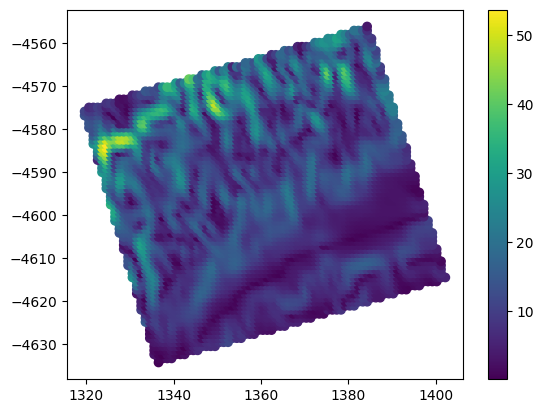

In [6]:
import richdem as rd

def calculate_slope_aspect(coordinates: np.ndarray):
    """
    Calculate the slope and aspect of a terrain represented by a numpy array using RichDEM.

    :param coordinates: A numpy array representing the terrain surface.
    :return: Two numpy arrays containing latitude, longitude, and slope or aspect values.
    """
    rd_terrain = rd.rdarray(coordinates[:,:,2], no_data=-9999)
    slope = rd.TerrainAttribute(rd_terrain, attrib='slope_riserun')
    aspect = rd.TerrainAttribute(rd_terrain, attrib='aspect')

    # Create numpy arrays to store the latitude, longitude, and slope or aspect values
    slope_array = np.zeros((coordinates.shape[0], coordinates.shape[1], 3))
    aspect_array = np.zeros((coordinates.shape[0], coordinates.shape[1], 3))

    slope_array[:, :, 0:2] = coordinates[:, :, 0:2]
    aspect_array[:, :, 0:2] = coordinates[:, :, 0:2]

    slope_array[:, :, 2] = slope
    aspect_array[:, :, 2] = aspect

    return slope_array, aspect_array

slope_array, aspect_array = calculate_slope_aspect(coordinates)

# plot slope array color coded by slope
lat = slope_array[:, :, 0].flatten()
lon = slope_array[:, :, 1].flatten()
slope = slope_array[:, :, 2].flatten()
plt.scatter(lat, lon, c=slope, cmap='viridis')  
plt.colorbar()


In [7]:
from scipy.interpolate import griddata

def terrain_analysis_pipeline(contour, resolution, distance_param=100.0, sigma=1):
    # Find points within the contour
    points = find_points(contour, resolution, distance_param)
    
    # Get the elevation data for the points
    elevations = get_elevation(points)
    
    # Merge the elevation data with the latitude and longitude coordinates
    merged_data = [(lat, lon, ele) for (lat, lon), ele in zip(points, elevations)]

    # Define the grid
    lats, lons = zip(*points)
    min_lat, max_lat = min(lats), max(lats)
    min_lon, max_lon = min(lons), max(lons)
    grid_lats = np.linspace(min_lat, max_lat, resolution)
    grid_lons = np.linspace(min_lon, max_lon, resolution)
    grid_lat, grid_lon = np.meshgrid(grid_lats, grid_lons)

    # Interpolate the elevation data onto the grid
    grid_elevations = griddata(points, elevations, (grid_lat, grid_lon), method='linear')
    coordinates = np.stack([grid_lat, grid_lon, grid_elevations], axis=-1)

    # Smooth the terrain
    smoothed_coordinates = coordinates
    smoothed_coordinates[:, :, 2] = gaussian_filter(coordinates[:, :, 2], sigma=sigma)

    # Calculate slope and aspect arrays
    slope_array, aspect_array = calculate_slope_aspect(smoothed_coordinates)

    return smoothed_coordinates, slope_array, aspect_array

import matplotlib.pyplot as plt

def plot_terrain_data(smoothed_coordinates, slope_array, aspect_array):
    fig, axes = plt.subplots(1, 3, figsize=(15, 5))

    # Plot the smoothed coordinates
    im1 = axes[0].imshow(smoothed_coordinates[:, :, 2], cmap='terrain', origin='lower')
    axes[0].set_title('Smoothed Coordinates')
    fig.colorbar(im1, ax=axes[0], orientation='vertical', fraction=0.046, pad=0.04)

    # Plot the slope array
    im2 = axes[1].imshow(slope_array, cmap='viridis', origin='lower')
    axes[1].set_title('Slope Array')
    fig.colorbar(im2, ax=axes[1], orientation='vertical', fraction=0.046, pad=0.04)

    # Plot the aspect array
    im3 = axes[2].imshow(aspect_array, cmap='twilight_shifted', origin='lower')
    axes[2].set_title('Aspect Array')
    fig.colorbar(im3, ax=axes[2], orientation='vertical', fraction=0.046, pad=0.04)

    plt.show()

# Run the terrain analysis pipeline
smoothed_coordinates, slope_array, aspect_array = terrain_analysis_pipeline(square_contour, resolution=1800)

# Plot the results
# plot_terrain_data(smoothed_coordinates, slope_array, aspect_array)



: 

: 